In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Load the csv file 
data = pd.read_csv("Data/week2.csv")
del data['Unnamed: 0']
duplicate_data = data 
data.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,OHLC Avg Price,Day_Perc_Change,Trend
0,2019-10-24,1780.78,1770.78,1787.97,1760.78,5200000.0,10,2019,1780.780000,1775.0775,0.000000,Slight or No change
1,2019-10-23,1762.17,1761.30,1770.05,1742.00,2190000.0,10,2019,1775.264993,1758.8800,-0.010450,Slight or No change
2,2019-10-22,1765.73,1788.15,1789.78,1762.00,2230000.0,10,2019,1773.054699,1776.4150,0.002020,Slight or No change
3,2019-10-21,1785.66,1769.66,1785.88,1765.00,2220000.0,10,2019,1775.418193,1776.5500,0.011287,Slight or No change
4,2019-10-18,1757.51,1787.80,1793.98,1749.20,3370000.0,10,2019,1771.450368,1772.1225,-0.015764,Slight or No change


In [3]:
data['Date'].dtype

dtype('O')

In [4]:
#Converting datatype of date to datetime64
data.Date = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.index.dtype)

datetime64[ns]


C:\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


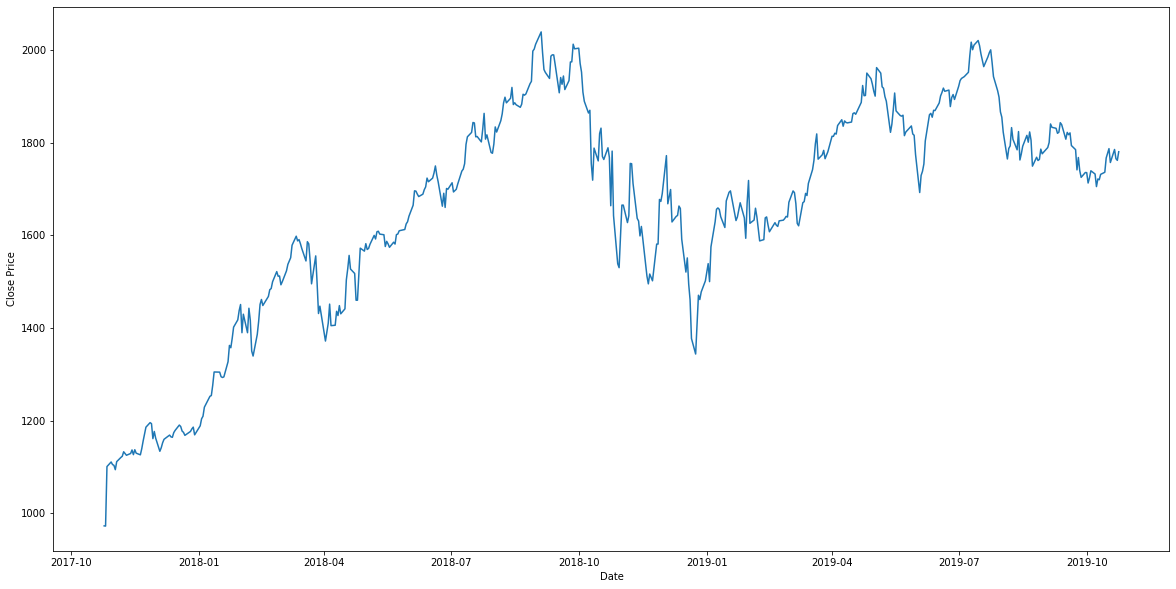

In [5]:
#Plotting the closing price of each of the days for the entire time frame
plt.subplots(figsize=(20, 10))
sns.lineplot(data=data, x=data.index, y='Close Price')
plt.show()

In [6]:
data['Close Price'].diff().abs().sort_values(ascending = False)

Date
2018-10-25    139.36
2017-10-26    128.52
2018-12-24    126.94
2018-10-24    117.97
2018-10-09    115.07
               ...  
2018-09-12      0.13
2018-11-26      0.09
2018-04-24      0.08
2018-11-01      0.00
2019-10-24       NaN
Name: Close Price, Length: 503, dtype: float64

In [7]:
#top 5 closing price differences are significant and hence can be considered as drastic change days
#news reports
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 

news1 = 'https://www.cnbc.com/2018/10/25/aws-q3-results.html'
r = requests.get(news1) 
soup = BeautifulSoup(r.content,"html.parser")
header = soup.find('div', class_ = "ArticleHeader-headline")
stock_news = soup.find('div',class_ = 'group')
print("News 2018/10/25")
print("Report:")
print (stock_news.text)

news2 = 'https://www.cnbc.com/2017/10/26/amazon-earnings-q3-2017.html'
r = requests.get(news2) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news = soup.find('div',class_ = 'group')
print("News 2017/10/26")
print("Report:")
print (stock_news.text)

news3 = 'https://www.cnbc.com/2018/12/24/amazon-on-track-for-worst-quarter-since-q3-2001.html'
r = requests.get(news3) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news = soup.find('div',class_ = 'group')
print("News 2018/12/24")
print("Report:")
print (stock_news.text)

print("No News available for 2018/10/24\n")


news5= 'https://www.cnbc.com/2018/10/09/suze-ormans-no-1-money-regret-selling-amazon-stock.html'
r = requests.get(news5) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news = soup.find('div',class_ = 'group')
print("News 2018/12/24")
print("Report:")
print (stock_news.text)

News 2018/10/25
Report:
Amazon's cloud business grew 46 percent in the third quarter.AWS' $2.1 billion in operating profit accounted for 56 percent of total operating earnings.
News 2017/10/26
Report:
Amazon reported its third quarter results Thursday after the bell.It was a huge beat across the board.Amazon shares jumped over 7 percent in after hours trading.
News 2018/12/24
Report:
The last time Amazon's stock had a quarter this bad the company had only been selling the Kindle for a year.Amazon is just one of many tech stocks to get hit hard in the fourth-quarter market rout.
No News available for 2018/10/24

News 2018/12/24
Report:
Looking back on the past few decades, Suze Orman has one major money-related regret: Buying around $5,000 worth of Amazon stock in 1997 — and selling it just a few years later."If I had kept the number of shares that I had originally purchased for Amazon, oh my God, I can't even imagine what that would be worth today," the personal finance expert and best

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


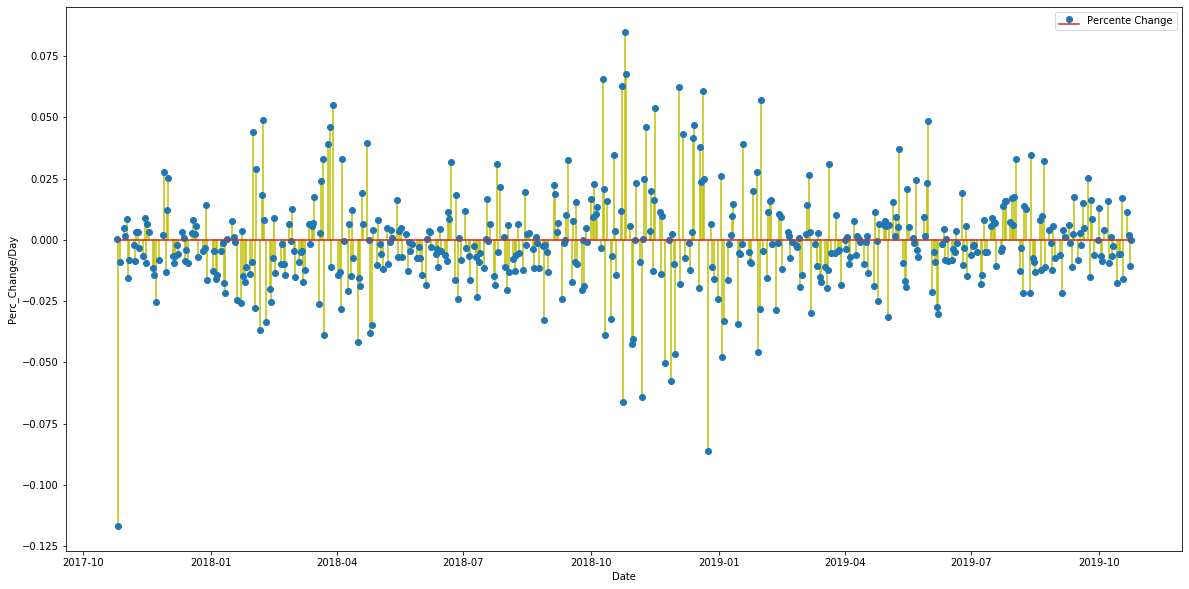

In [8]:
#Stem plot of the daily change in of the stock price in percentage.
plt.subplots(figsize=(20, 10))
plt.stem(data.index, data.Day_Perc_Change,'y', label='Percente Change')
plt.xlabel('Date')
plt.ylabel('Perc_Change/Day')
plt.legend()
plt.show()
#The graph sugest that these variables are highly correlated as high volume make more Percentage change and vice versa.

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


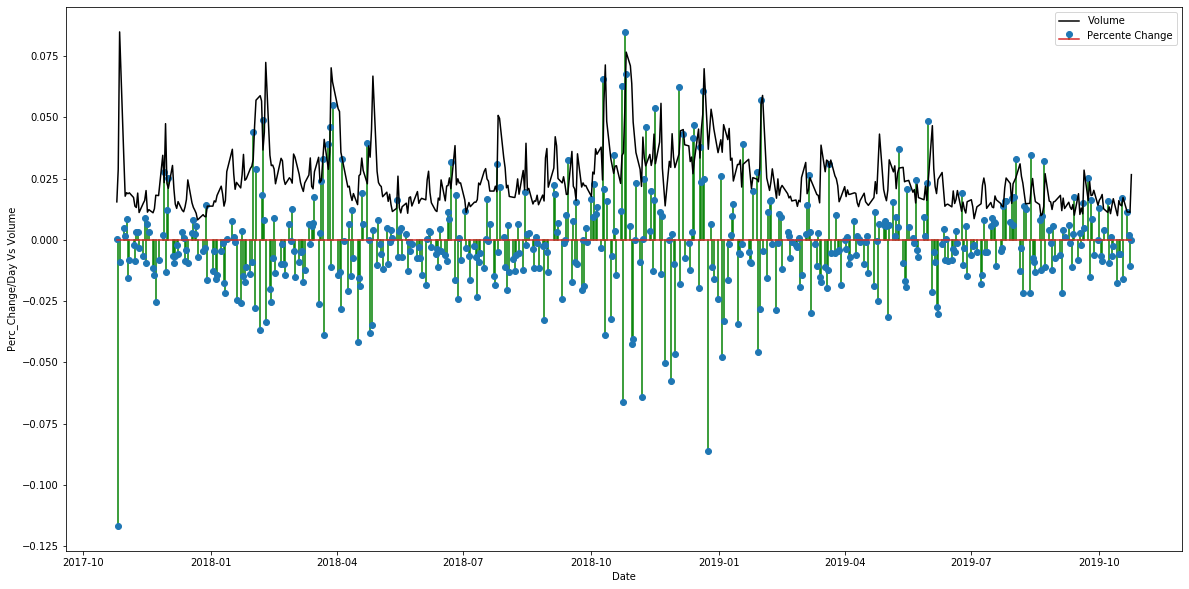

In [9]:
#daily volumes of the stock compared to the percentage stem plot.

vol =  data['Total Traded Quantity']
vol = vol/vol.max() * data.Day_Perc_Change.max()

plt.subplots(figsize=(20, 10))
plt.stem(data.index, data.Day_Perc_Change , 'g', label='Percente Change')
plt.plot(data.index, vol , 'k', label='Volume')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Perc_Change/Day Vs Volume')
plt.show()

([<matplotlib.patches.Wedge at 0x2b439d68688>],
 [Text(-2.0206672185931328e-16, -1.1, '503.0')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

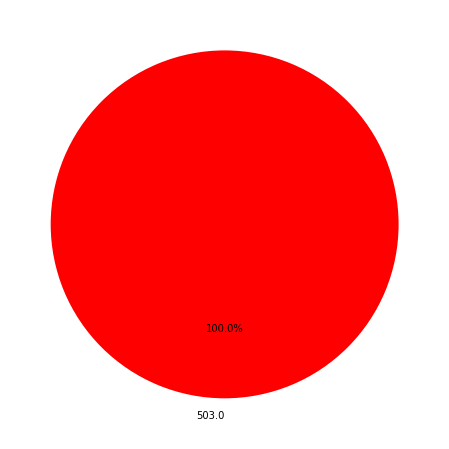

In [10]:
#pie chart for all the 'Trend' to know about relative frequency of each trend.
#the stock data I recieved was of only one trend type.
fig = plt.figure(figsize=(12, 8))
data['ones'] = np.ones((data.shape[0]))
sums = data.ones.groupby(data.Trend).sum()
plt.pie(sums, labels=sums,colors='r',startangle=90, autopct='%.1f%%')

In [11]:
vall = data.groupby(['Trend'])['Total Traded Quantity']
vall.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,503.0,4.820656e+06,2.350537e+06,1590000.0,3135000.0,4270000.0,5820000.0,16570000.0


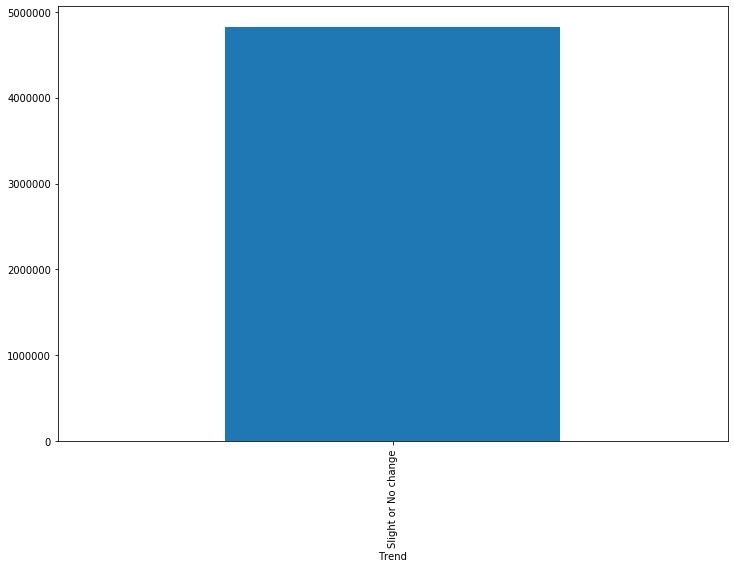

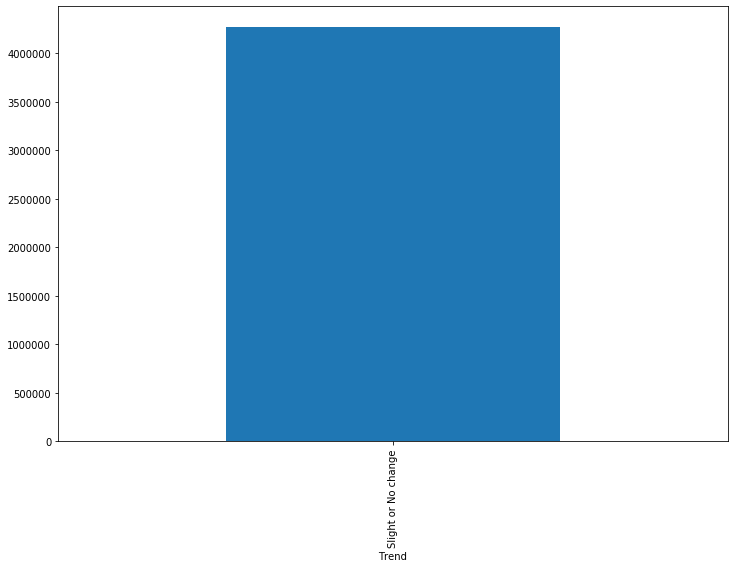

In [13]:
#BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.
plt.figure(figsize=(12,8))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

plt.figure(figsize=(12,8))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

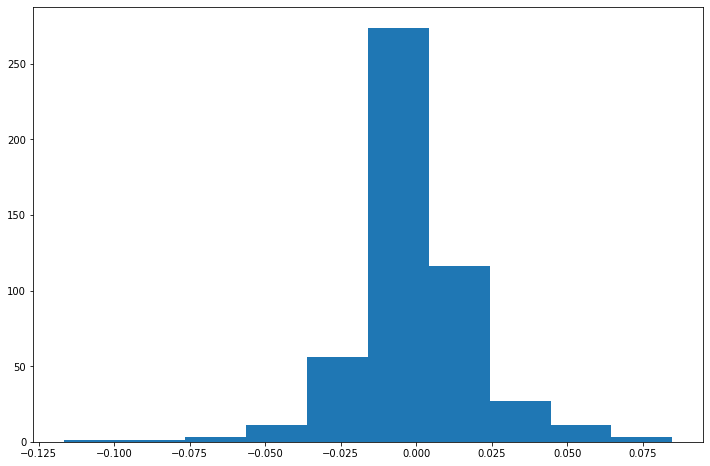

In [14]:
#Histogram of the daily percetage change of the stock.
plt.figure(figsize=(12,8))
plt.hist(data['Day_Perc_Change'])
plt.show()

In [15]:
#Analysing the correlation between the percentage changes in the five stocks.
HINDUNILVR = pd.read_csv('Data/HINDUNILVR.csv')
ITC = pd.read_csv('Data/ITC.csv')
LT = pd.read_csv('Data/LT.csv')
MM = pd.read_csv('Data/M&M.csv')
TITAN = pd.read_csv('Data/TITAN.csv')

In [16]:
f_HINDUNILVR = HINDUNILVR[HINDUNILVR.Series == 'EQ']
f_HINDUNILVR

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44
491,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36
492,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14
493,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07


In [17]:
f_ITC= ITC[ITC.Series == 'EQ']
f_ITC

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,ITC,EQ,07-May-2019,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
492,ITC,EQ,08-May-2019,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
493,ITC,EQ,09-May-2019,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35
494,ITC,EQ,10-May-2019,299.85,300.00,300.45,296.90,297.15,297.75,298.68,6904657,2.062297e+09,132469,4024203,58.28


In [18]:
f_LT = LT[LT.Series == 'EQ']
f_LT

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89


In [19]:
f_MM = MM[MM.Series == 'EQ']
f_MM

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,M&amp;M,EQ,15-May-2017,1367.85,1373.00,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
1,M&amp;M,EQ,16-May-2017,1375.65,1377.00,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
2,M&amp;M,EQ,17-May-2017,1366.35,1363.00,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
3,M&amp;M,EQ,18-May-2017,1378.80,1369.00,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
4,M&amp;M,EQ,19-May-2017,1352.85,1350.00,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,M&amp;M,EQ,07-May-2019,638.50,641.75,642.90,634.2,635.55,636.00,637.64,3160875,2.015496e+09,72445,2366596,74.87
493,M&amp;M,EQ,08-May-2019,636.00,635.55,637.00,619.0,624.60,621.65,631.73,3853705,2.434492e+09,51461,3092701,80.25
494,M&amp;M,EQ,09-May-2019,621.65,620.90,627.95,616.1,625.80,625.45,621.74,1366143,8.493796e+08,52412,538598,39.42
495,M&amp;M,EQ,10-May-2019,625.45,626.25,631.85,619.0,625.85,628.75,624.59,2093110,1.307326e+09,55778,1074491,51.33


In [20]:
f_TITAN = TITAN[TITAN.Series == 'EQ']
f_TITAN

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TITAN,EQ,15-May-2017,495.00,489.65,490.00,472.40,486.00,483.65,479.93,3897357,1.870465e+09,52478,1722661,44.20
1,TITAN,EQ,16-May-2017,483.65,486.00,491.00,480.80,490.00,488.30,487.32,1308863,6.378316e+08,33942,563667,43.07
2,TITAN,EQ,17-May-2017,488.30,490.00,490.10,477.30,481.00,481.75,482.25,859054,4.142814e+08,26686,448314,52.19
3,TITAN,EQ,18-May-2017,481.75,479.00,482.60,470.05,470.85,471.65,474.78,811219,3.851526e+08,24621,438716,54.08
4,TITAN,EQ,19-May-2017,471.65,475.00,479.50,460.35,469.65,471.15,469.05,1022479,4.795891e+08,27225,263561,25.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,TITAN,EQ,07-May-2019,1082.85,1097.80,1105.00,1083.00,1090.00,1086.50,1094.54,2605643,2.851972e+09,83154,507973,19.50
492,TITAN,EQ,08-May-2019,1086.50,1090.00,1100.00,1067.85,1096.80,1088.70,1085.83,3336769,3.623149e+09,92788,472241,14.15
493,TITAN,EQ,09-May-2019,1088.70,1100.00,1110.00,1088.70,1103.20,1104.45,1099.15,4362293,4.794807e+09,131781,751092,17.22
494,TITAN,EQ,10-May-2019,1104.45,1108.00,1137.85,1094.30,1129.45,1132.10,1117.09,3032624,3.387712e+09,101440,1044911,34.46


In [21]:
stocks = ['HINDUNILVR','ITC','LT','MM','TITAN']
close_prices_df = pd.DataFrame(columns = stocks)
close_prices_df['HINDUNILVR'] = f_HINDUNILVR['Close Price']
close_prices_df['ITC'] = f_ITC['Close Price']
close_prices_df['LT'] = f_LT['Close Price']
close_prices_df['MM'] = f_MM['Close Price']
close_prices_df['TITAN'] = f_TITAN['Close Price']

close_prices_df

,HINDUNILVR,ITC,LT,MM,TITAN
0,983.25,277.95,1742.40,1375.65,483.65
1,1000.40,283.45,1740.70,1366.35,488.30
2,1009.40,281.65,1755.45,1378.80,481.75
3,990.25,277.90,1722.60,1352.85,471.65
4,1008.00,286.20,1724.55,1333.40,471.15
...,...,...,...,...,...
490,1697.50,307.00,1360.35,645.80,1082.85
491,1688.70,301.90,1356.45,638.50,1086.50
492,1703.75,300.65,1355.50,636.00,1088.70
493,1687.45,299.85,1317.65,621.65,1104.45


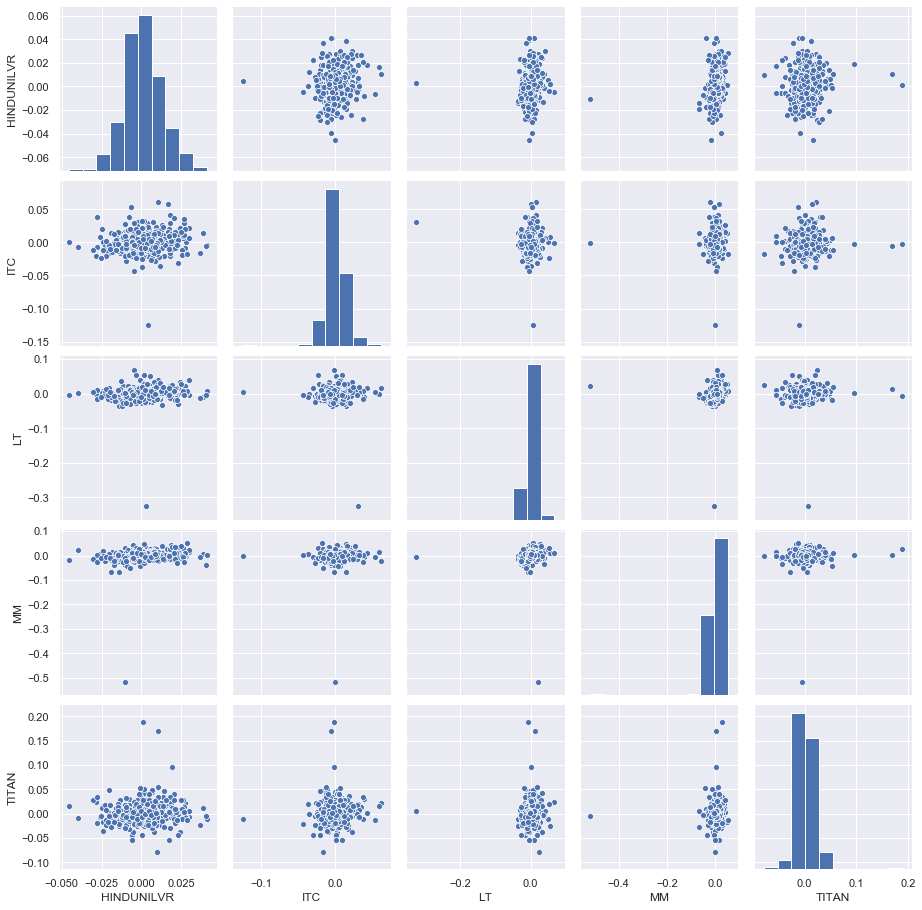

In [22]:
pct_df = close_prices_df.pct_change().fillna(0)

sns.set(color_codes=True)
sns.pairplot(pct_df)

In [23]:
# Calculating the 7 day rolling average of the percentage change of any of the stock prices and standard deviation
rolling_avg = pct_df['HINDUNILVR'].rolling(7).mean()
sd= rolling_avg.fillna(0).std()
sd

0.004158601464657394

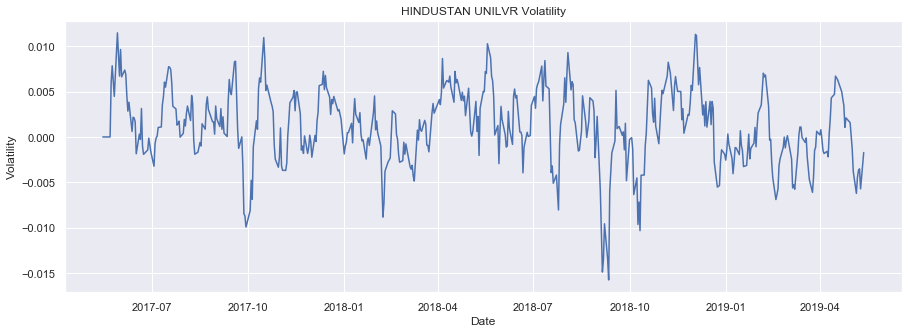

In [24]:
ax = pd.to_datetime(f_HINDUNILVR['Date']).tolist()
plt.figure(figsize=(15,5))
plt.plot(ax,rolling_avg.fillna(0).tolist())
plt.title('HINDUSTAN UNILVR Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [25]:
#Calculating the volatility for the Nifty index and comparing theese 2.
#This leads us to a useful indicator known as 'Beta'.

nifty = pd.read_csv('Data/Nifty50.csv')
nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


No handles with labels found to put in legend.


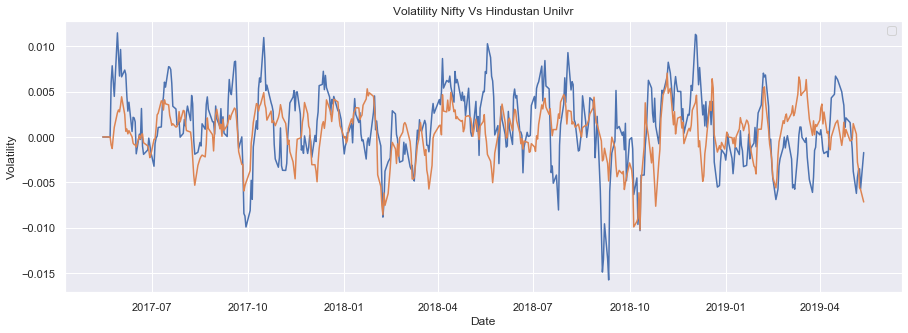

In [26]:
nifty_close_price = nifty['Close']
nifty_change = nifty_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
bx = pd.to_datetime(nifty['Date']).tolist()

plt.subplots(figsize=(15, 5))
plt.plot(ax,rolling_avg.fillna(0).tolist())
plt.plot(bx,nifty_change.fillna(0).tolist())
plt.legend()
plt.title('Volatility Nifty Vs Hindustan Unilvr')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

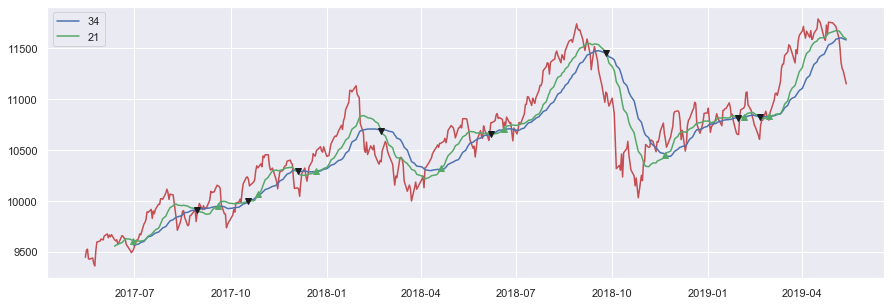

In [27]:
#Trade Calls - Using Simple Moving Averages.

#21 day and 34 day Moving average with the average price and deciding a Call
#Call should be buy whenever the smaller moving average (21) crosses over longer moving 
#average (34) AND the call should be sell whenever smaller moving average crosses under 
#longer moving average. One of the most widely used technical indicators.

nifty.Date = pd.to_datetime(nifty['Date'])
nifty['r21'] = nifty['Close'].rolling(21).mean()
nifty['r34'] = nifty['Close'].rolling(34).mean()
nifty.dropna()

def whenCrosses(values):
    l=[]
    val = values[0]
    flag = True
    for i, ele in enumerate(values):
        if val==ele:
            l.append(0)
        else:
            l.append(1)
            val = ele
    return l

nifty['buy'] = nifty['r34']<nifty['r21']
nifty['sell'] = nifty['r34']>nifty['r21']

nifty['buy_change'] = np.array(whenCrosses(nifty.buy.values.reshape(1, len(nifty.buy)).flatten()))
nifty['sell_change'] = np.array(whenCrosses(nifty.sell.values.reshape(1, len(nifty.sell)).flatten()))

nifty['buy'] = nifty['buy_change'].where(nifty['buy']==True)
nifty['buy'] = nifty['r21'].where(nifty['buy']==1)
nifty['sell'] = nifty['sell_change'].where(nifty['sell']==True)
nifty['sell'] = nifty['r21'].where(nifty['sell']==1)

plt.subplots(figsize=(15, 5))
plt.plot(nifty.Date, nifty.Close, 'r')
plt.plot(nifty.Date, nifty.r34, 'b', label='34')
plt.plot(nifty.Date, nifty.r21, 'g', label='21')
plt.plot(nifty.Date, nifty.buy, "g^")
plt.plot(nifty.Date, nifty.sell, "kv")
plt.legend()
plt.show()


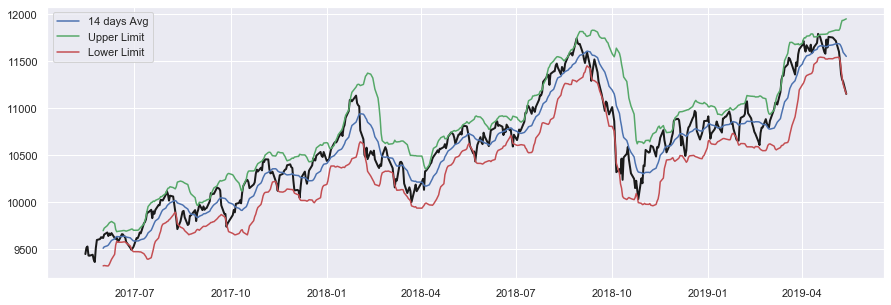

In [28]:
#Trade Calls - Using Bollinger Bands

#The bollinger bands comprise the following data points- 
#The 14 day rolling mean of the closing price (we call it the average) 
#Upper band which is the rolling mean + 2 standard deviations away from the average. 
#Lower band which is the rolling mean - 2 standard deviations away from the average. 
#Average Daily stock price

nifty['bollinger'] = nifty['Close'].rolling(14).mean()
std = nifty['Close'].rolling(14).std()
nifty['upper'] = nifty['bollinger'] + 2 * std 
nifty['lower'] = nifty['bollinger'] - 2 * std

plt.subplots(figsize=(15, 5))
plt.plot(nifty.Date, nifty['Close'], 'k', lw=2)
plt.plot(nifty.Date, nifty['bollinger'], 'b', label='14 days Avg')
plt.plot(nifty.Date, nifty['upper'], 'g', label='Upper Limit')
plt.plot(nifty.Date, nifty['lower'], 'r', label='Lower Limit')
plt.legend()
plt.show()

#Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations ,and especially useful in sideways moving market. 